In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, feature
import pandas as pd

In [2]:
indcs = [10,17,19,29]

img = io.imread('features/Trainable Weka Segmentation v3.3.1.tif')

def read_mask(fname):
    mask = io.imread(f'features/{fname}.tif')
    mask += 1
    mask[mask != 1] = 0
    return mask


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


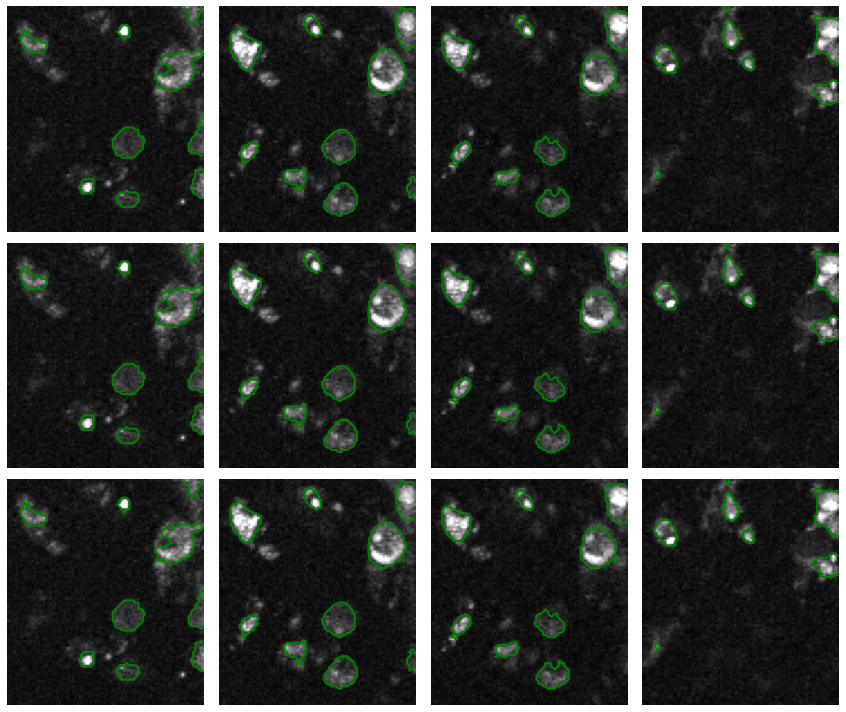

In [8]:

GT = io.imread('features/GroundTruth.tif')
masks = []
fnames = [
    # 'GroundTruth',
    '3first',
    'MeanVariance',
    'Derivatives',
]
colors = [
    [0,1,0],
    [0,0.8,0],
    [0,0.6,0]
]

def overlay_mask(ax, stack, z, mask, color):
    # fig = plt.figure(figsize=(8,8))
    contours = measure.find_contours(mask[z], 0.5)
    ax.imshow(stack[z], cmap='gray')
    for contour in contours:
        line = ax.plot(contour[:,1], contour[:,0], color=color, lw=2)
    line[0].set_label(z * 0.7736944)
    ax.axis('off')
    # plt.legend()
    # fig.savefig(f'temp/{z*0.7736944:.1f}.png')
    # plt.show()
    return ax

fig, axes = plt.subplots(3, 4, figsize=(12,10))
for i, rowax in enumerate(axes):
    for j, colax in enumerate(rowax):
        mask = read_mask(fnames[i])
        ax = overlay_mask(colax, img, indcs[j], mask, 'green')

plt.tight_layout()
plt.show()